In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.optimize import curve_fit
from matplotlib import rcParams

import utilities as ut

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 30
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 25
rcParams['xtick.labelsize'] = 25
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

# Obtención típica de cabeza

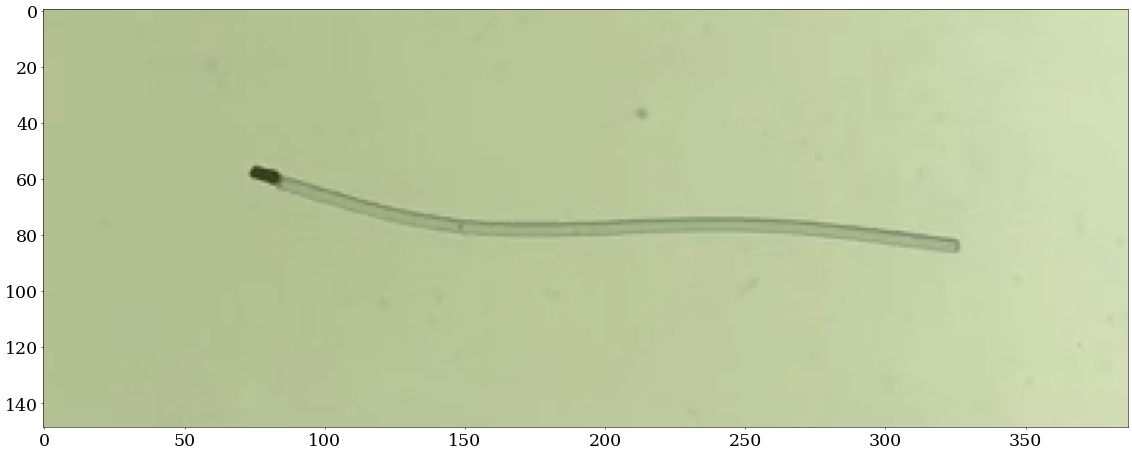

In [11]:
# La imagen con todos los canales
im = cv.imread('example_media/filamento.png')
plt.imshow(im)

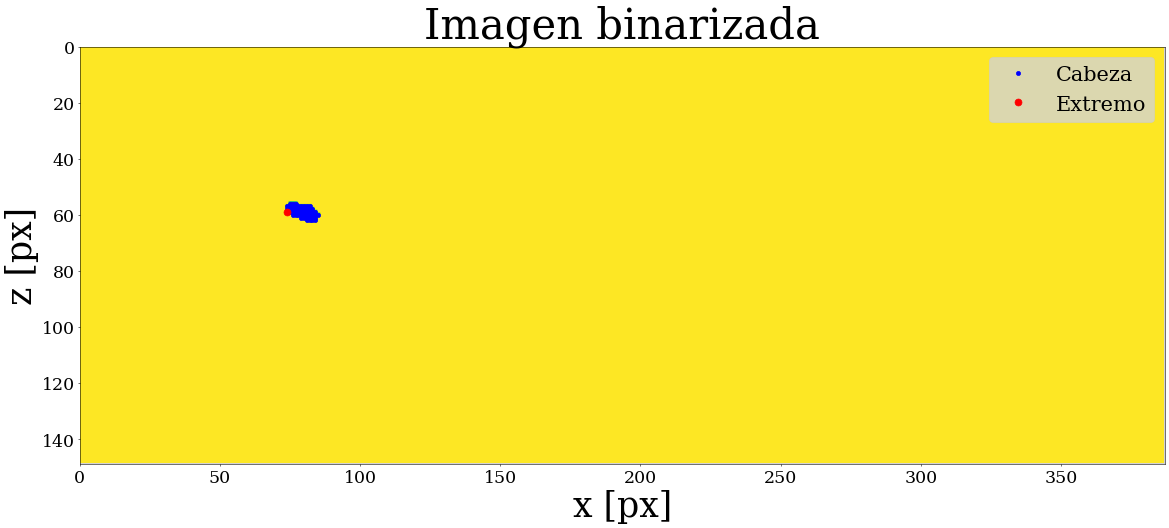

In [12]:
#Binarizamos la imagen
im_bin = ut.binarize(im)
#Obtenemos la posición de la cabeza
#La función find de utilities.py devuelve las posiciones de los pixeles de la cabeza y del extremo.
#Esta función además asume que el nadador nada de derecha a izquierda.
x, y, x_head, y_head = ut.find(im_bin)

#Ploteamos
fig, ax = plt.subplots()
ax.set_xlim(0, im.shape[1])
ax.set_ylim(0, im.shape[0])
plt.gca().invert_yaxis()

ax.set_title('Imagen binarizada')
ax.imshow(im_bin)
ax.plot(x,y, 'o', color='b', label='Cabeza')
ax.plot(x_head, y_head, 'o', color = 'r', markersize=10, label='Extremo')

ax.set_ylabel('z [px]')
ax.set_xlabel('x [px]')

ax.legend()

## Posición de la cabeza para todo tiempo

In [13]:
#Defino el nombre de mi archivo y creo el objeto de VideoCapture
video_name = 'ECO20-45mm-2,00Vpp-8Hz.mp4'
vs = cv.VideoCapture('example_media/{0}'.format(video_name))

#Defino los limites de mi imagen (x0, x1, y0, y1)
#Estos limites son los que se usan en la función track_head para enfocar el area del nadador
limites = [319, 950, 250, 505]

#Devuelve la posición de la cabeza del nadador en la imagen en pixeles
pos_x, pos_y = ut.track_head(vs, limites, SHOW=True)

#La posicíon es relativa a los límites que recortamos asi que movemos el 0,0 a la posición original
pos_x+=limites[0]
pos_y+=limites[2]

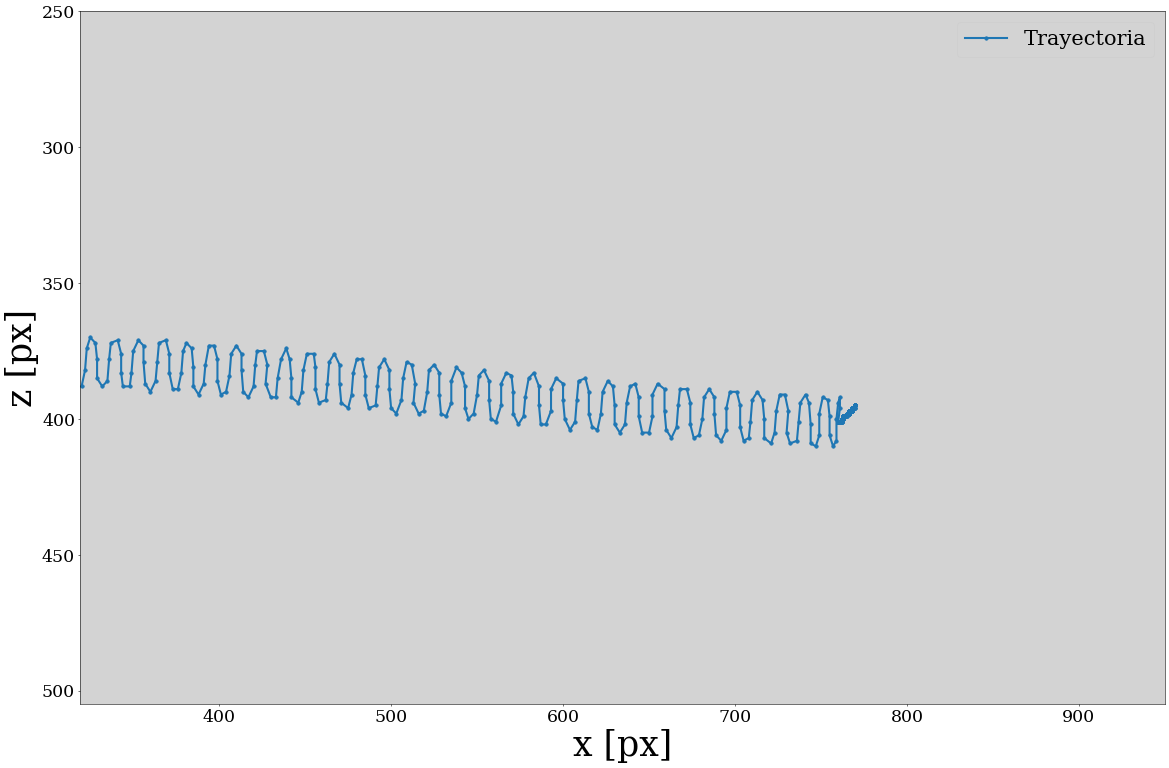

In [14]:
plt.plot(pos_x,pos_y,'.-',ms=10, lw=3, label='Trayectoria')
plt.xlim([limites[0],limites[1]])
plt.ylim([limites[2],limites[3]])
plt.xlabel('x [px]')
plt.ylabel('z [px]')
plt.gca().invert_yaxis()
plt.legend()

# Calibración por método de cabecilla de imán de neodimio

In [39]:
# Definimos el area de la cabecilla del imán en mm^2
HEAD_AREA_MM2 = 1000*(924)*1e-6  #largo*(diametro) de la cabecilla [µm^2 -> mm^2]

#Obtenemos la posición de la cabeza
im = cv.imread('example_media/filamento.png')
im_bin = ut.binarize(im)
x, y, x_head, y_head = ut.find(im_bin)

#Obtenemos la cantidad total de píxeles oscuros
number_of_pixels = im_bin[im_bin==0].size
print(f'El número de pixeles oscuros es: {number_of_pixels}')

#Lo relacionamos con el área de la cabecilla
mm2_per_px = HEAD_AREA_MM2 / number_of_pixels
print(f'Por lo tanto el mm2 por píxel^2 es: {mm2_per_px}')
print(f'y el mm por píxel es: {np.sqrt(mm2_per_px)}')

El número de pixeles oscuros es: 53
Por lo tanto el mm2 por píxel^2 es: 0.01743396226415094
y el mm por píxel es: 0.13203773045668024


In [40]:
#También podemos hacer la calibración para el video entero y obtener un promedio
video_name = 'ECO20-45mm-2,00Vpp-8Hz.mp4'
vs = cv.VideoCapture('example_media/{0}'.format(video_name))
limites = [319, 950, 250, 505]

#La función de calibración devuelve el resultado en px/mm
calibracion, delta_calibracion = ut.calibrate_with_head(vs, limites, HEAD_AREA_MM2)

print('Calibración promedio es: {0} +/- {1}'.format(np.mean(calibracion), np.mean(delta_calibracion)))

Calibración promedio es: 7.479115910948772 +/- 0.008596573337805995


Text(0, 0.5, 'Calibración [px/mm]')

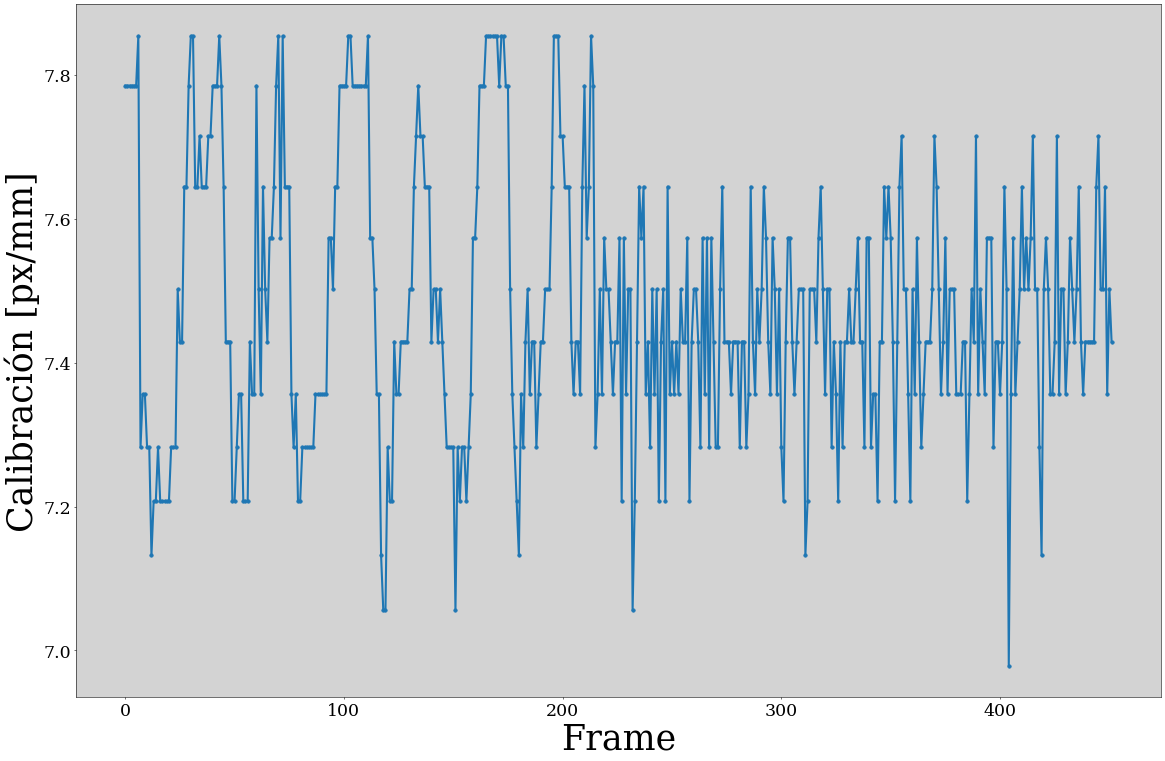

In [41]:
plt.plot(calibracion, '.-', ms=10, lw=3, label='Calibración')
plt.xlabel('Frame')
plt.ylabel('Calibración [px/mm]')